Sintering Trajectories: Description on How Density, Surface Area, and Grain Size Change

G =  Current Average Grain Size  
G_o = Average Initial Grain Size    
Ep = Fractional Porosity (1-f)    
Theta = starting grain size and porosity condition  
Alpha =  diffusivity and surface energy  
t = time  
f = Current Fractional Density    
fo = Original Fractional Density  
N = coefficient often near 1/6 - 1/3  
K = temperature dependent rate parameter  
Y = Change in Length / Original Length   
Css = Contiguity (Grain Boundary/Total Grain Perimeter)  
Kss = grain growth rate parameter solid-solid interface  
Ksv = grain growth rate parameter solid-vapor interface  
q = factor (1.5)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.metrics import r2_score

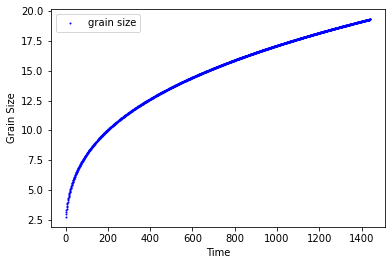

In [30]:
# density definitions
# density will climb from 0.64 to ideally 1 (but always slightly less) (somewhere between 0.85 and 1)
# we will take density from 0.64 to 0.95 (1000 points in between)
# we can add in some gaussian noise here as GN



t = np.arange(1, 1441, dtype=np.float64)

G_original = 2.5

K = 5

G = ((G_original**3)+K*t)**(1/3)


#Plot density with GN vs true density

plt.plot(t, G, 'bo', label="grain size", markersize=1)
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()

In [104]:
G_F = np.zeros((1440,1000))
G_F.shape

(1440, 100000)

In [108]:
G_F = np.zeros((1440,1000))


for i in range(1440):
    mu = 0
    sigma = 2
    MP = 1000
    GN = np.random.normal(mu, sigma, MP)   
    G_F[i] = G[i]+GN
    tt = np.expand_dims(t, axis=1)
    K_measured = (G_F**3 - G_F[0]**3)/tt

    

In [106]:
G_F[1439,40]

21.892562722728517

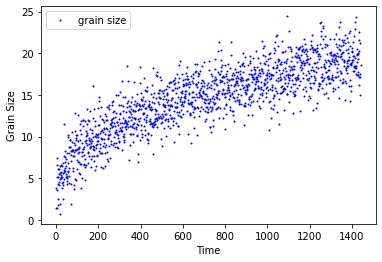

In [107]:
plt.plot(t, G_F[:,7], 'bo', label="grain size", markersize=1)
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()


In [77]:
tt = np.expand_dims(t, axis=1)

In [78]:
K_measured = (G_F**3 - G_F[0]**3)/tt

In [79]:
K_measured[:,2]

array([  0.        , -35.21336569, -24.03630329, ...,   6.20353418,
         3.47172308,   4.23553342])

In [80]:
K_measured.shape

(1440, 10000)

In [81]:
K2 = np.array([K_measured[1439]])
K3 = np.array([K_measured[1380], K_measured[1439]])
K4 = np.array([K_measured[1320], K_measured[1380], K_measured[1439]])
K5 = np.array([K_measured[1260], K_measured[1320], K_measured[1380], K_measured[1439]])
K6 = np.array([K_measured[1200], K_measured[1260], K_measured[1320], K_measured[1380], K_measured[1439]])
K7 = np.array([K_measured[1140], K_measured[1200], K_measured[1260], K_measured[1320], K_measured[1380], K_measured[1439]])
K8 = np.array([K_measured[1080], K_measured[1140], K_measured[1200], K_measured[1260], K_measured[1320], K_measured[1380], K_measured[1439]])



In [92]:
x = random.randint(10000, size=(1))
K2M = K2[:, x]
x = random.randint(10000, size=(1))
K3M = K3[:, x]
x = random.randint(10000, size=(1))
K4M = K4[:, x]
x = random.randint(10000, size=(1))
K5M = K5[:, x]
x = random.randint(10000, size=(1))
K6M = K6[:, x]
x = random.randint(10000, size=(1))
K7M = K7[:, x]
x = random.randint(10000, size=(1))
K8M = K8[:, x]


In [93]:
KA2 = np.average(K2M)
KA3 = np.average(K3M)
KA4 = np.average(K4M)
KA5 = np.average(K5M)
KA6 = np.average(K6M)
KA7 = np.average(K7M)
KA8 = np.average(K8M)

In [94]:
print(K8M)

[[1.16801096]
 [7.77776856]
 [1.49195385]
 [1.90281955]
 [4.52960187]
 [3.54609538]
 [3.9912542 ]]


In [95]:
KT = np.array([KA2, KA3, KA4, KA5, KA6, KA7, KA8])

In [96]:
print(KT)

[5.24357855 6.14710511 5.3886978  6.30451324 5.99581361 6.2493926
 3.48678634]


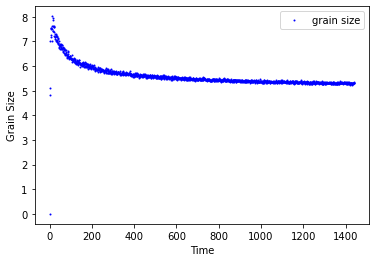

[0.         4.8386711  5.09894698 ... 5.3160181  5.326888   5.32255956]


In [97]:
l = np.mean(K_measured, axis=1)
plt.plot(t, l, 'bo', label="grain size", markersize=1)
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()
print(l)

In [ ]:
KE = (np.abs((K - K_measured)/K))*100

In [ ]:
np.average(KE[700])

In [ ]:
KE[:]